In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = []
labels = []
im_width = 150
im_height = 150
num_classes = 7

In [6]:
for i in range(7):
    path="/content/gdrive/My Drive/Project2Data/"+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
#         print(int(path[-2]))
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Image done of Disease type:'  + path[-2])

/content/gdrive/My Drive/Project2Data/1/
Progress 100 Image done of Disease type:1
Progress 200 Image done of Disease type:1
Progress 300 Image done of Disease type:1
Progress 400 Image done of Disease type:1
Progress 500 Image done of Disease type:1
Progress 600 Image done of Disease type:1
Progress 700 Image done of Disease type:1
Progress 800 Image done of Disease type:1
Progress 900 Image done of Disease type:1
Progress 1000 Image done of Disease type:1
Progress 1100 Image done of Disease type:1
Progress 1200 Image done of Disease type:1
Progress 1300 Image done of Disease type:1
Progress 1400 Image done of Disease type:1
Progress 1500 Image done of Disease type:1
Progress 1600 Image done of Disease type:1
Progress 1700 Image done of Disease type:1
Progress 1800 Image done of Disease type:1
/content/gdrive/My Drive/Project2Data/2/
Progress 100 Image done of Disease type:2
Progress 200 Image done of Disease type:2
Progress 300 Image done of Disease type:2
Progress 400 Image done of 

In [0]:

data = np.array(data)
labels = np.array(labels)

In [0]:
data = data.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)


In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

In [0]:
import numpy as np
import os
import time
#from resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

#from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
#Shuffle the dataset
x,y = shuffle(data,labels, random_state=2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [15]:
image_input = Input(shape=(150, 150, 3))
model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#model.summary()

87916544/87910968 [==============================] - 8s 0us/step


In [0]:
last_layer = model.output

In [0]:

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

In [0]:
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)

In [0]:
x = Dropout(0.2)(x)
x = Dense(100, activation='relu',name='fc-2')(x)
x = Dropout(0.1)(x)
# a softmax layer for 4 classes
out = Dense(7, activation='softmax',name='output_layer')(x)

In [72]:
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
for layer in custom_resnet_model2.layers[:-300]:
	layer.trainable = False

In [0]:
custom_resnet_model2.layers[-300].trainable

custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=20, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 9012 samples, validate on 3863 samples
Epoch 1/10
9012/9012 [==============================] - 50s 6ms/step - loss: 1.2252 - acc: 0.5605 - val_loss: 13.7971 - val_acc: 0.1338
Epoch 2/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.8242 - acc: 0.7170 - val_loss: 13.7543 - val_acc: 0.1424
Epoch 3/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.6961 - acc: 0.7633 - val_loss: 13.8149 - val_acc: 0.1429
Epoch 4/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.6484 - acc: 0.7735 - val_loss: 13.7138 - val_acc: 0.1341
Epoch 5/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.5928 - acc: 0.7969 - val_loss: 13.7923 - val_acc: 0.1312
Epoch 6/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.5469 - acc: 0.8134 - val_loss: 13.9141 - val_acc: 0.1320
Epoch 7/10
9012/9012 [==============================] - 45s 5ms/step - loss: 0.5122 - acc: 0.8253 - val_loss: 13.8987 - val_acc: 0.1312


In [76]:
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=32, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Training time: -589.5455214977264
3863/3863 [==============================] - 12s 3ms/step
[INFO] loss=13.7577, accuracy: 13.6940%


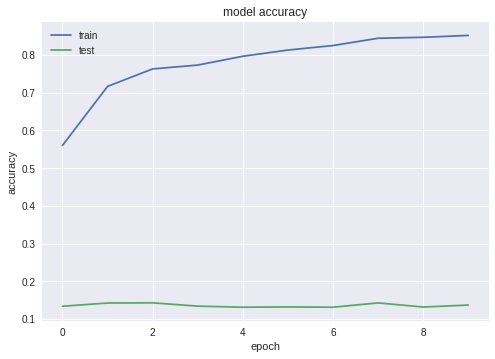

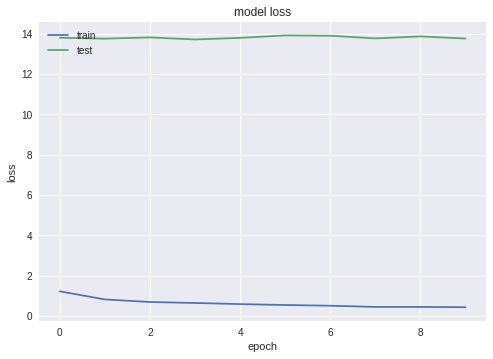

In [78]:
#accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()